In [1]:
#|default_exp app

In [2]:
#|export
from fastai.vision.all import *
import gradio as gr

/Users/dmartinec/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
/Users/dmartinec/Library/Python/3.9/lib/python/site-packages/transformers/utils/generic.py:441: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  _torch_pytree._register_pytree_node(


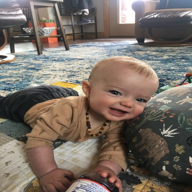

In [4]:
im = PILImage.create('images/Finley.jpeg')
im.thumbnail((192,192))
im

In [20]:
#|export
# Copied from https://n90l9ahmyv.clg07azjl.paperspacegradient.com/lab/tree/bear_multicat.ipynb

# from parent_label
def get_y(o):
    parent_name = Path(o).parent.name
    if parent_name in bear_types:
        return [parent_name]
    return []

In [5]:
#|export
learn = load_learner('Finley_multicat.pkl') #'export.pkl')

In [6]:
learn.predict(im)

('Finley', tensor(0), tensor([9.9999e-01, 9.3897e-06]))

In [7]:
#|export
categories = ('Finley', 'bird')

def classify_image(im):
    pred, idx, probs = learn.predict(im)
    return dict(zip(categories, map(float, probs)))

In [8]:
classify_image(im)

{'Finley': 0.9999905824661255, 'bird': 9.389701517648064e-06}

In [9]:
#|export
image = gr.Image(width=192, height=192)
label = gr.Label()
examples = ['images/Finley.jpeg', 'images/bird.jpg']

intf = gr.Interface(fn=classify_image, inputs=image, outputs=label, examples=examples)
intf.launch(inline=False)

Running on local URL:  http://127.0.0.1:7861

To create a public link, set `share=True` in `launch()`.


/Users/dmartinec/Library/Python/3.9/lib/python/site-packages/gradio/analytics.py:106: UserWarning: IMPORTANT: You are using gradio version 4.44.0, however version 4.44.1 is available, please upgrade. 
--------
  warnings.warn(


In [10]:
import nbdev

In [12]:
nbdev.export.nb_export('app.ipynb')